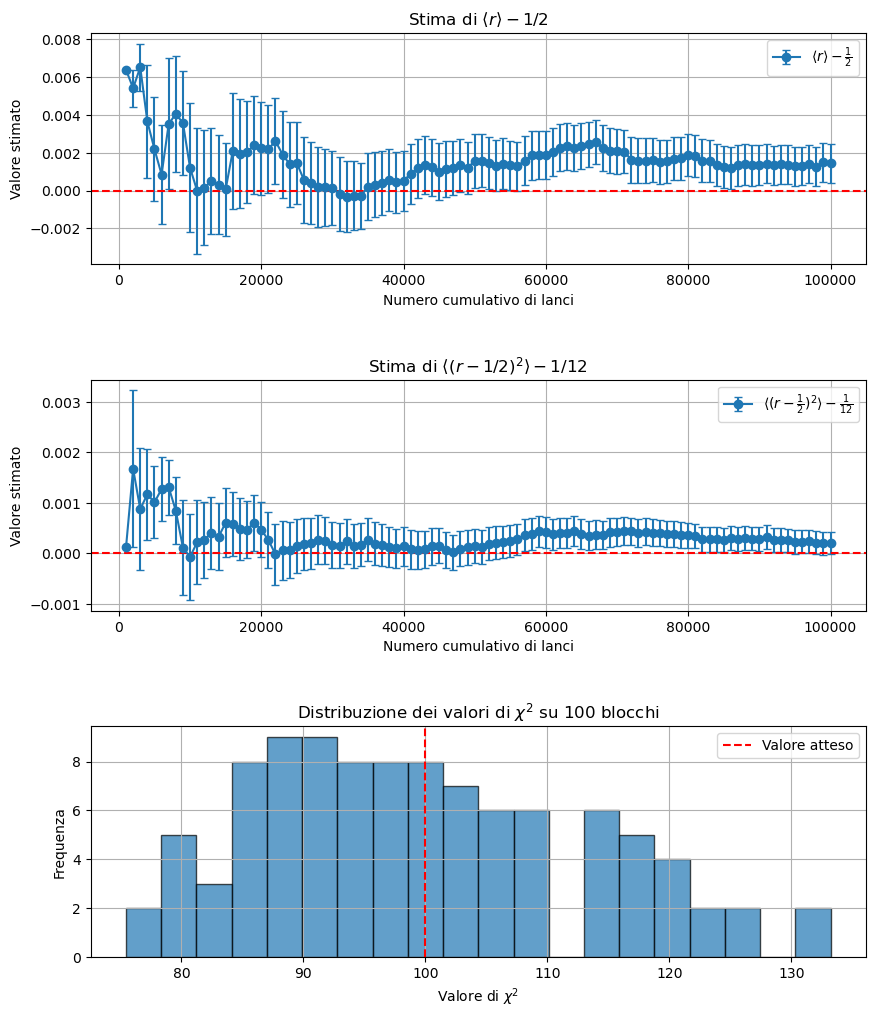

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dati da file: media <r> - 1/2
data1 = np.loadtxt("Es01.1r.txt")
n_throws1 = data1[:, 0]         # Numero cumulativo di lanci (x)
r_minus_half1 = data1[:, 1]     # Valore stimato di <r> - 1/2
uncertainty1 = data1[:, 2]      # Incertezza associata (errore standard)

# Caricamento dati: varianza <(r - 1/2)^2> - 1/12
data2 = np.loadtxt("Es01.1devi.txt")
n_throws2 = data2[:, 0]         # Numero cumulativo di lanci
r_minus_half2 = data2[:, 1]     # Valore stimato di <(r - 1/2)^2> - 1/12
uncertainty2 = data2[:, 2]      # Incertezza associata

# Caricamento dati: 100 valori di chi²
data3 = np.loadtxt("Es01.1chi.txt")
chi_values = data3[:, 1]        # Solo seconda colonna con i valori di chi²

# Crea una figura composta da 3 sottografi (uno sopra l’altro)
plt.figure(figsize=(10, 12))      # Dimensioni della figura in pollici (x, y)
plt.subplots_adjust(hspace=0.5)  # Spazio verticale tra i subplot

# Primo grafico: <r> - 1/2
plt.subplot(3, 1, 1)  # (righe, colonne, posizione)
plt.errorbar(n_throws1, r_minus_half1, yerr=uncertainty1, fmt='o-', capsize=3,
             label=r'$\langle r \rangle - \frac{1}{2}$')  # Grafico a punti con barre d’errore
plt.axhline(0, color='red', linestyle='--')  # Linea orizzontale a y = 0 (valore teorico atteso)
plt.title(r'Stima di $\langle r \rangle - 1/2$')  # Titolo con LaTeX, raw string
plt.xlabel('Numero cumulativo di lanci')  # Etichetta asse x
plt.ylabel('Valore stimato')              # Etichetta asse y
plt.grid(True)
plt.legend()

# Secondo grafico: varianza - 1/12
plt.subplot(3, 1, 2)
plt.errorbar(n_throws2, r_minus_half2, yerr=uncertainty2, fmt='o-', capsize=3,
             label=r'$\langle (r - \frac{1}{2})^2 \rangle - \frac{1}{12}$')
plt.axhline(0, color='red', linestyle='--')
plt.title(r'Stima di $\langle (r - 1/2)^2 \rangle - 1/12$')
plt.xlabel('Numero cumulativo di lanci')
plt.ylabel('Valore stimato')
plt.grid(True)
plt.legend()

# Terzo grafico: istogramma dei valori di chi²
plt.subplot(3, 1, 3)
plt.hist(chi_values, bins=20, edgecolor='black', alpha=0.7)  # Istogramma dei 100 valori di chi²
plt.axvline(100, color='red', linestyle='--', label='Valore atteso')  # Linea verticale a chi² teorico
plt.title(r'Distribuzione dei valori di $\chi^2$ su 100 blocchi')
plt.xlabel(r'Valore di $\chi^2$')
plt.ylabel('Frequenza')
plt.grid(True)
plt.legend()

# Mostra i grafici
plt.show()


### 📈 Commento ai grafici

#### 🔹 Grafico 1: Stima di ⟨r⟩ - 1/2
- La media dei numeri casuali generati viene confrontata con il valore teorico di 1/2.
- I punti mostrano oscillazioni attorno allo zero, ma tendono a stabilizzarsi man mano che aumenta il numero di blocchi.
- La linea rossa tratteggiata rappresenta il valore teorico atteso (0).
- L'incertezza stimata diminuisce con l'aumentare dei lanci, come previsto.

#### 🔹 Grafico 2: Stima di ⟨(r - 1/2)^2⟩ - 1/12
- Si verifica che la varianza campionaria sia compatibile con quella della distribuzione uniforme su [0,1], ovvero 1/12.
- Anche qui il valore stimato tende verso zero (differenza dal valore teorico).
- L’andamento mostra buona stabilità e precisione con l’aumentare dei dati.

#### 🔹 Grafico 3: Distribuzione dei valori di χ²
- Si mostra un istogramma con i 100 valori del test di χ² ottenuti dividendo l’intervallo [0,1] in 100 sottointervalli.
- Il valore medio teorico è 100 (numero di gradi di libertà), indicato dalla linea rossa.
- La distribuzione è centrata attorno al valore atteso, come previsto per una buona distribuzione uniforme dei dati.
- Non ci sono outlier sospetti → il generatore è compatibile con l’ipotesi di uniformità.

#### ✅ Conclusione
Tutti e tre i grafici confermano che:
- Il generatore pseudo-casuale distribuisce correttamente i numeri su [0,1].
- L'incertezza stimata tramite data blocking si comporta come previsto.
- I test statistici (media, varianza e χ²) sono tutti compatibili con le attese teoriche.
